#### THIS NOTEBOOK WILL HELP US IN THE LOADING, PREPROCESSING, TRAINING AND TESTING OUR MODELS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 

In [24]:
## load the dataset
df = pd.read_csv('../data/student.csv')
df.head()

,Hours,Scores
0,3.745401,38.342517
1,9.507143,88.394709
2,7.319939,75.100383
3,5.986585,62.918777
4,1.560186,18.400816


In [25]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [26]:
df.describe()

,Hours,Scores
count,1000.000000,1000.000000
mean,4.902566,49.520134
std,2.921374,29.405477
min,0.046320,-8.944768
25%,2.359733,23.473018
50%,4.968074,50.288723
75%,7.443196,73.803470
max,9.997177,107.559364


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   1000 non-null   float64
 1   Scores  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [29]:
### lets carryout data cleaning
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

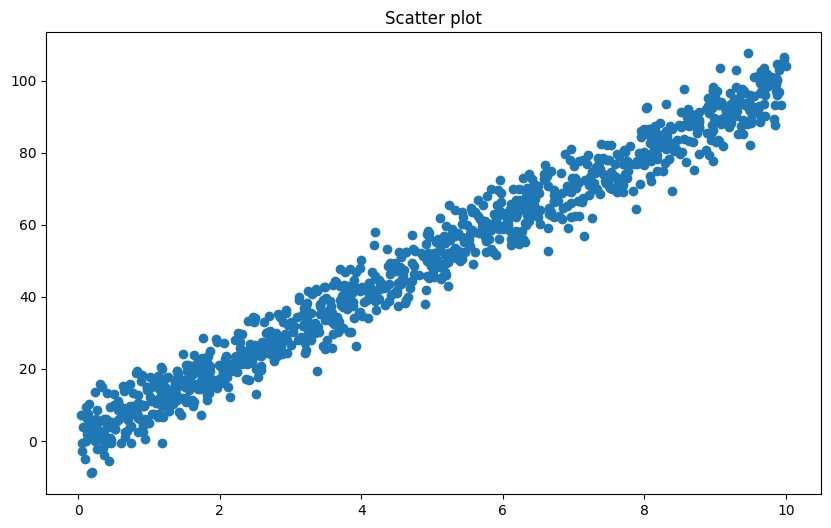

In [30]:
## Create a scatter plot

plt.figure(figsize=(10,6))
plt.scatter(df['Hours'], df['Scores'])
plt.title('Scatter plot')
plt.show()

In [31]:
### Scatter plot shows there is a strong positive relationship between score and hours studied


In [36]:
### Lest train the model
X = df[['Hours']]
y = df['Scores']
X.shape, y.shape

((1000, 1), (1000,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
### Lets predict
y_pred = model.predict(X_test)
y_pred

array([38.74389308, 81.97236468, 46.85851495, 36.28396362, 95.21374048,
       97.13933563, 46.84412199, 86.87993974,  7.47334651, 52.42550578,
       84.18470675, 77.47507572, 53.79730505, 22.27925177, 12.63669509,
        9.43777659, 89.2552714 , 11.28316549, 31.88136812, 25.78176246,
       77.57905666, 64.96440954,  2.76198102, 28.07997706, 55.39629273,
       72.63161472, 64.09505724, 69.25339964, 18.95508614, 90.2487328 ,
       63.96441594, 97.36868404, 21.72453979, 98.80021195, 10.95272465,
       88.96567338, 28.73201483, 63.79646651,  3.58648842, 33.23150083,
       42.58439535, 52.81662869,  3.46927078,  4.04792676,  9.42179657,
       65.43975863, 43.14132842, 28.59423068,  9.02507036, 36.90873253,
       51.94916532, 22.97690442, 99.18150254, 49.77903402, 37.30240887,
       61.23118432, 28.42430745,  2.99639126, 57.33839193, 80.60856741,
       77.34839969, 60.2742761 , 23.63872688, 16.90855709, 12.92290699,
       51.31626708, 61.05557198, 16.35615181, 77.57175227, 67.59

In [42]:
### Lets evaluate
print(f"R2_score: {r2_score(y_test, y_pred)}")
print(f" mse:{mean_squared_error(y_test, y_pred)}")

R2_score: 0.9751218640328666
 mse:21.119571095075823


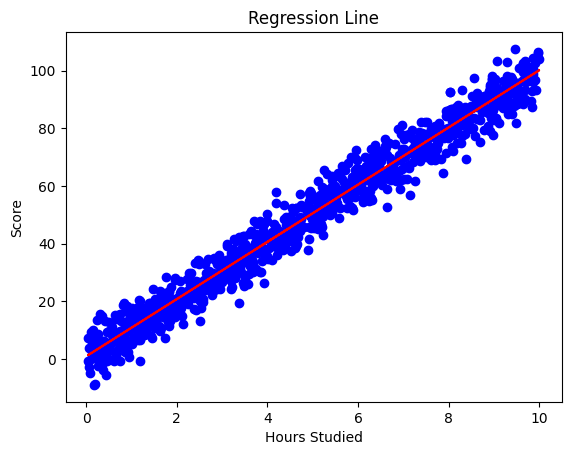

In [43]:
line = model.coef_ * X + model.intercept_

plt.scatter(X, y, color='blue')
plt.plot(X, line, color='red')  # regression line
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Regression Line')
plt.show()


In [44]:
### Lets predict with the model
hours = 7.5
predicted_score = model.predict([[hours]])
print(f"Predicted score for studying {hours} hours: {predicted_score[0]:.2f}")


Predicted score for studying 7.5 hours: 75.36


c:\Users\BOBBY\Desktop\PRICE_PREDICTION_APP\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
### let save the model
import joblib

joblib.dump(model, '../models/prediction_model.pkl')

['../models/prediction_model.pkl']